In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
file_path = '/Users/damandeepsingh/Documents/RRC/Term2[FALL 2024]/COMP-2040 (258749) Python Essentials With Data Analysis/final project/DiamondsPrices.csv'
diamonds_df = pd.read_csv(file_path)

# Display basic info
print(diamonds_df.info())
print(diamonds_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50119 entries, 0 to 50118
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50119 non-null  float64
 1   cut      50119 non-null  object 
 2   color    50119 non-null  object 
 3   clarity  50119 non-null  object 
 4   depth    50119 non-null  float64
 5   table    50119 non-null  float64
 6   price    50119 non-null  int64  
 7   x        50119 non-null  float64
 8   y        50119 non-null  float64
 9   z        50119 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB
None
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     

In [10]:
# Statistical summary of numerical columns
print(diamonds_df.describe())

# Check for missing values
print(diamonds_df.isnull().sum())

# Display unique values for categorical columns
print(diamonds_df['cut'].unique())
print(diamonds_df['color'].unique())
print(diamonds_df['clarity'].unique())

              carat         depth         table         price             x  \
count  50119.000000  50119.000000  50119.000000  50119.000000  50119.000000   
mean       0.715756     61.749903     57.417129   3122.587322      5.568415   
std        0.369533      1.417246      2.226349   2724.401592      0.978111   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.380000     61.100000     56.000000    907.000000      4.660000   
50%        0.660000     61.800000     57.000000   2131.000000      5.560000   
75%        1.010000     62.500000     59.000000   4624.500000      6.420000   
max        1.950000     79.000000     79.000000  11883.000000      8.160000   

                  y             z  
count  50119.000000  50119.000000  
mean       5.572035      3.439029  
std        0.978031      0.619484  
min        0.000000      0.000000  
25%        4.680000      2.870000  
50%        5.560000      3.410000  
75%        6.415000      3.980000  


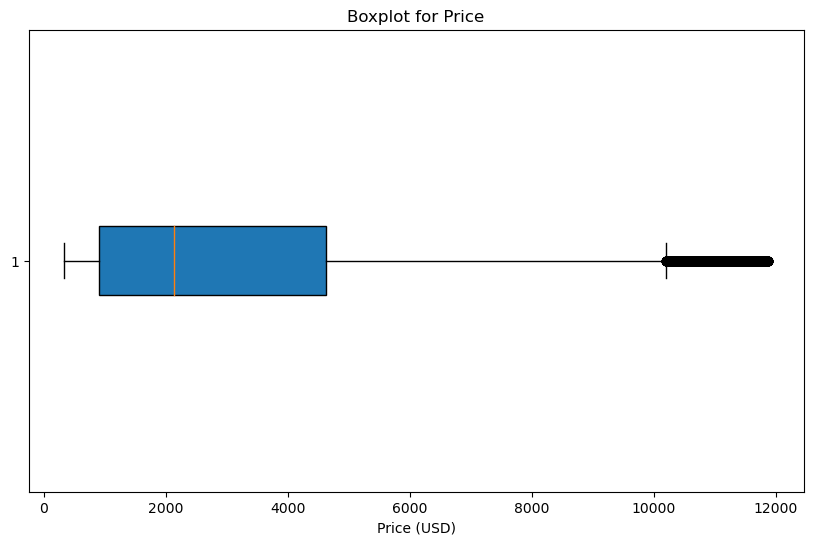

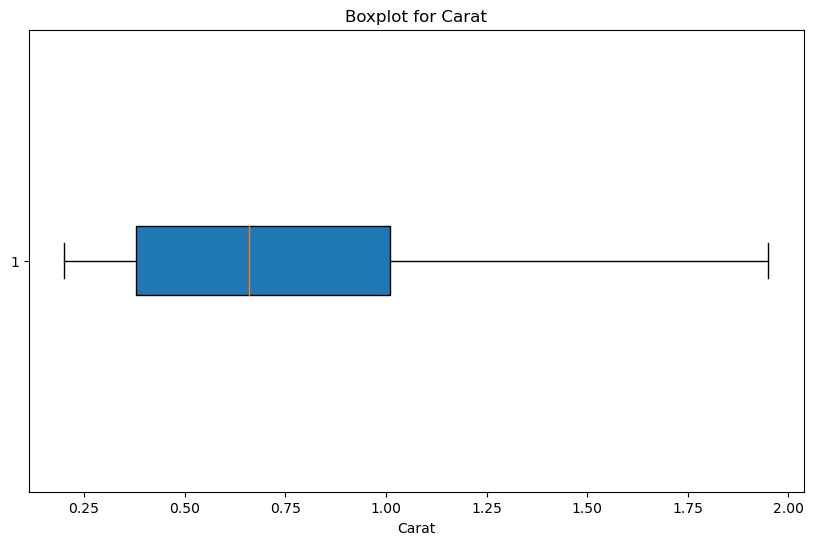

In [11]:
# Boxplot for price
plt.figure(figsize=(10, 6))
plt.boxplot(diamonds_df['price'], vert=False, patch_artist=True)
plt.title("Boxplot for Price")
plt.xlabel("Price (USD)")
plt.show()

# Boxplot for carat
plt.figure(figsize=(10, 6))
plt.boxplot(diamonds_df['carat'], vert=False, patch_artist=True)
plt.title("Boxplot for Carat")
plt.xlabel("Carat")
plt.show()

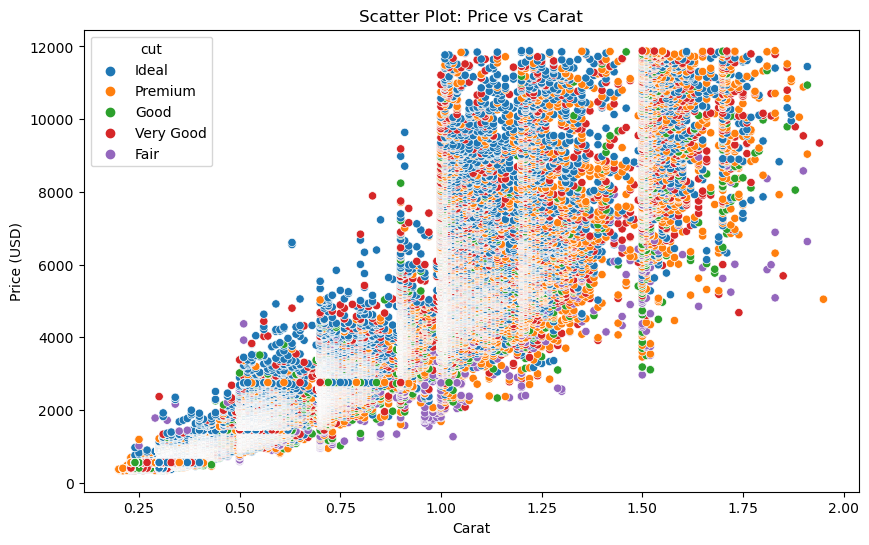

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diamonds_df, x='carat', y='price', hue='cut')
plt.title("Scatter Plot: Price vs Carat")
plt.xlabel("Carat")
plt.ylabel("Price (USD)")
plt.show()

In [13]:
# Define a function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from price and carat columns
diamonds_cleaned = remove_outliers(diamonds_df, 'price')
diamonds_cleaned = remove_outliers(diamonds_cleaned, 'carat')

print(f"Original dataset size: {diamonds_df.shape}")
print(f"Cleaned dataset size: {diamonds_cleaned.shape}")

Original dataset size: (50119, 10)
Cleaned dataset size: (48790, 10)


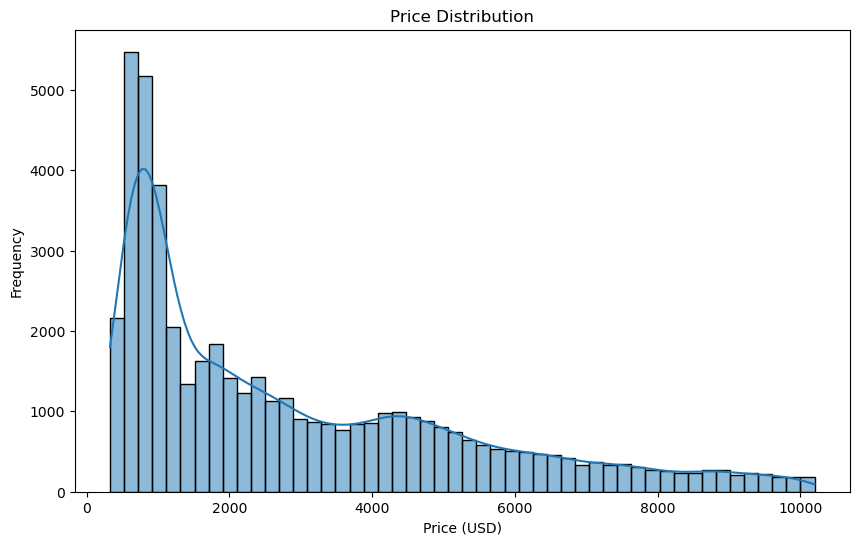

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(diamonds_cleaned['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

/opt/anaconda3/envs/SML/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


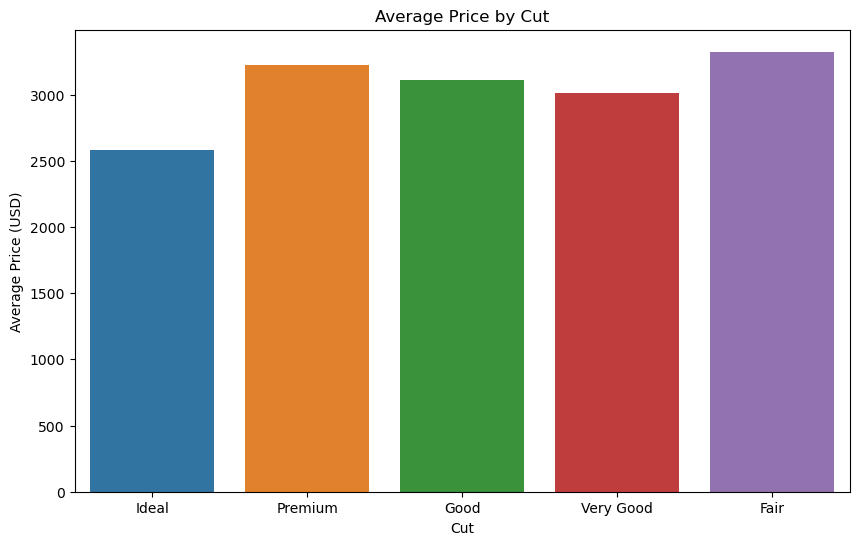

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=diamonds_cleaned, x='cut', y='price', ci=None)
plt.title("Average Price by Cut")
plt.xlabel("Cut")
plt.ylabel("Average Price (USD)")
plt.show()

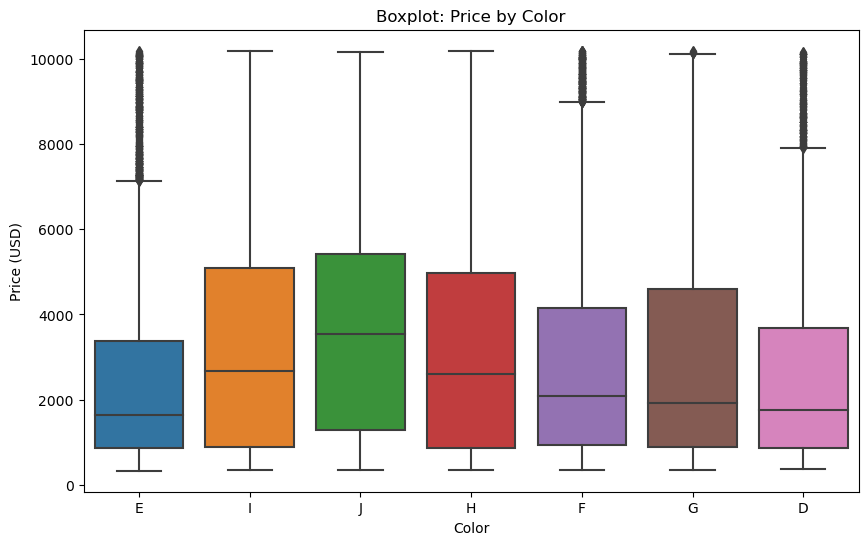

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=diamonds_cleaned, x='color', y='price')
plt.title("Boxplot: Price by Color")
plt.xlabel("Color")
plt.ylabel("Price (USD)")
plt.show()

In [17]:
# Convert categorical columns into dummy variables
diamonds_encoded = pd.get_dummies(diamonds_cleaned, columns=['cut', 'color', 'clarity'], drop_first=True)

# Features and target variable
X = diamonds_encoded.drop(['price'], axis=1)
y = diamonds_encoded['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Define models to train
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, rmse, r2))

# Convert results into a DataFrame for comparison
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
print(results_df)

               Model         MAE        RMSE        R²
0  Linear Regression  444.023412  640.615511  0.929422
1      Decision Tree  261.843001  493.794704  0.958066
2      Random Forest  194.632375  355.096940  0.978315
3  Gradient Boosting  284.995586  500.029866  0.957000


In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for Random Forest
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Train the optimized Random Forest model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate optimized model
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized Random Forest MAE: {mae_best}")
print(f"Optimized Random Forest RMSE: {rmse_best}")
print(f"Optimized Random Forest R²: {r2_best}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   3.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   3.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   3.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   7.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   7.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   7.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  15.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  16.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  16.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   3.6s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   3.5s
[CV] END max_depth=None, min_sa

/opt/anaconda3/envs/SML/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  


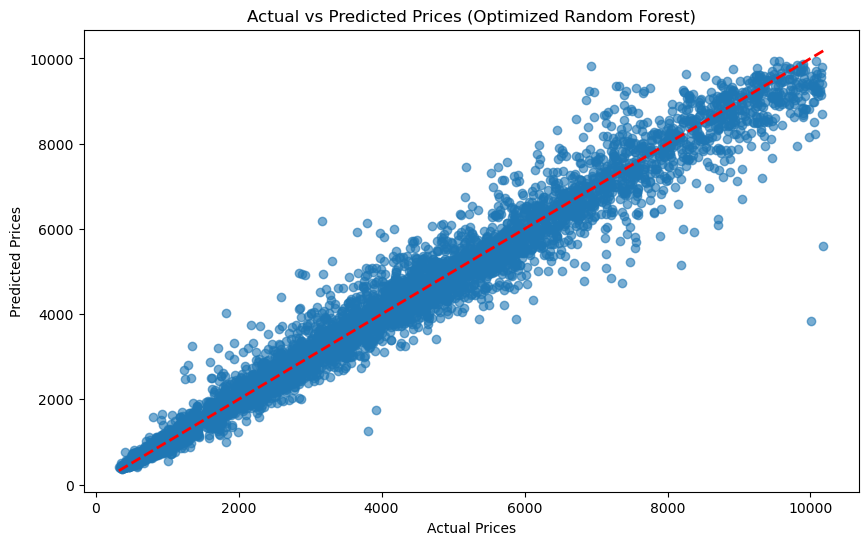

In [20]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red", lw=2)
plt.title("Actual vs Predicted Prices (Optimized Random Forest)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

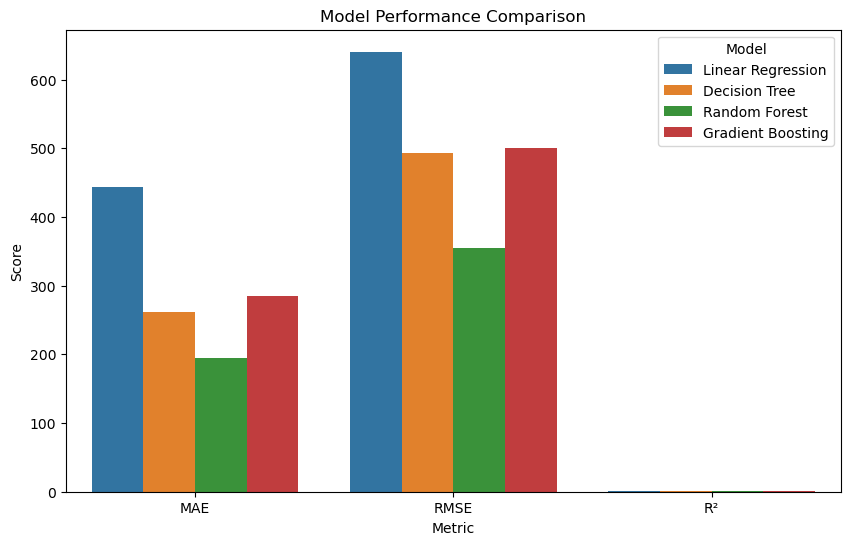

In [21]:
import seaborn as sns

# Bar plot to compare model performance
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Model", var_name="Metric", value_name="Score"), x="Metric", y="Score", hue="Model")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

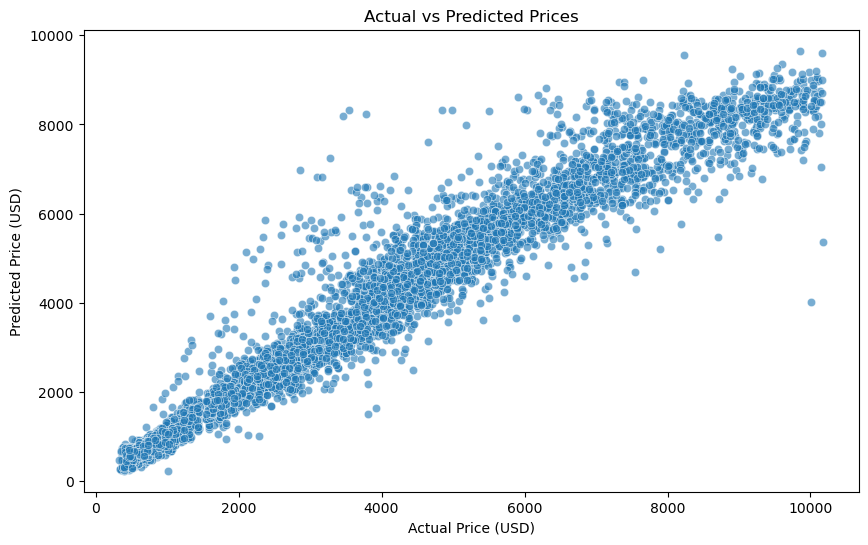

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.show()

In [13]:
# Save the cleaned dataset to a CSV file
diamonds_cleaned.to_csv('/Users/damandeepsingh/Documents/RRC/Term2[FALL 2024]/COMP-2040 (258749) Python Essentials With Data Analysis/final project/DiamondsPrices.csv', index=False)